In [1]:
!pip install youtube-dl
!pip install pytube
!pip install rdflib
!pip install pydotplus
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 66.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-bjm46frh
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git /tmp/pip-req-build-bjm46frh
  Resolved https://github.com/openai/whisper.git to commit 28769fcfe50755a817ab922a7bc83483159600a9
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 39.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 87.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 20.8 MB/s eta 0:00:00
  Created wheel for whisper: filename=whisper-1.0-py3-none-any.whl size=1175340 sha256=75f7d6423cf66ab61cda9a4e40e0a50b89be0f2d6906affb72f11eba

In [31]:
import youtube_dl
from pytube import YouTube
import io
import numpy as np
import pandas as pd
from rdflib import Graph, Literal, RDF, URIRef, Namespace
from rdflib.namespace import RDF, RDFS
import pydotplus
from IPython.display import display, Image
from rdflib.tools.rdf2dot import rdf2dot

In [12]:
# videos from crawler
def get_youtube_video_IDs():
    video_IDs = pd.read_csv(r'/content/drive/MyDrive/EntityGraph/Data/Videos/Video_Ids_comlete.csv')
    video_IDs = video_IDs['0']
    return video_IDs

video_IDs = get_youtube_video_IDs()
print(print(f'we work with {len(video_IDs)} videos'))
print(video_IDs)

we work with 7913 videos
None
0       --SZOi73UGU
1       --V9j3gJF_A
2       -0ENvOK1Rfg
3       -1ecuhQJwNU
4       -2SMvcgmCqA
           ...     
7908    _XTC00203xM
7909    _XWwJ24mL9g
7910    _xy90SNnXik
7911    _zB7Vib2OkE
7912    _ZgKt_nOt5g
Name: 0, Length: 7913, dtype: object


In [13]:
# randomly compare some videos
url_0 = 'https://www.youtube.com/watch?v=' + video_IDs[0]
url_1 = 'https://www.youtube.com/watch?v=' + video_IDs[10]
url_2 = 'https://www.youtube.com/watch?v=' + video_IDs[1000]

In [44]:
# video-info as entity in node
def video_info(url):
    ydl_opts = {}
    with youtube_dl.YoutubeDL(ydl_opts) as ydl:
        info = ydl.extract_info(url, download=False)

        #description = info["description"] # nur für die KI-Verfahren als Annotation
        title = info["title"]
        author = info["uploader"]
        thumb = info["thumbnail"]
        duration = info["duration"]
        
        video_information = pd.DataFrame(data= {'Title': [title],
                                                'Author' : [author],                                              
                                                'Duration': [duration],
                                                'Thumbnail' : [thumb]},
                                         index=[url])
        video_information.index.name = 'VideoURL'
        return video_information

[youtube] --SZOi73UGU: Downloading webpage
[youtube] -74a55e02nI: Downloading webpage
[youtube] brV8X02t3jU: Downloading webpage


In [142]:
# graph initialization
g = Graph()

In [143]:
# generate uri's
video_0_frame = video_info(url_0)
video_1_frame = video_info(url_1)
video_2_frame = video_info(url_2)

identifier_0 = video_0_frame.index[0]
identifier_1 = video_1_frame.index[0]
identifier_2 = video_2_frame.index[0]

[youtube] --SZOi73UGU: Downloading webpage
[youtube] -74a55e02nI: Downloading webpage
[youtube] brV8X02t3jU: Downloading webpage


In [145]:
# fill the graph
video_0 = np.array(video_info(url_0)).reshape(4)
video_1 = np.array(video_info(url_1)).reshape(4)
video_2 = np.array(video_info(url_2)).reshape(4)

video_entity_0 = URIRef(identifier_0)
video_entity_1 = URIRef(identifier_1)
video_entity_2 = URIRef(identifier_2)

g.add((video_entity_0, RDF.Property, Literal(video_0)))
g.add((video_entity_1, RDF.Property, Literal(video_1)))
g.add((video_entity_2, RDF.Property, Literal(video_2)))

# get graph & triples (s,p,o)
print('Graph g:\n', g.serialize(format='ttl'))
print(f'Graph g has {len(g)} facts')
for triples in g:
    print(f'triples{triples}')

Graph g:
 @prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .

<https://www.youtube.com/watch?v=--SZOi73UGU> rdf:Property """['Terme mit Klammern (Plus- und Minusklammern) | Terme und Gleichungen | Lehrerschmidt'
 'Lehrerschmidt' 310
 'https://i.ytimg.com/vi_webp/--SZOi73UGU/maxresdefault.webp']""" .

<https://www.youtube.com/watch?v=-74a55e02nI> rdf:Property """['Tonartwechsel & Modulationen in der Musik: Die Königsdisziplin der Harmonielehre ausführlich erklärt'
 'IchMachLala' 6243 'https://i.ytimg.com/vi/-74a55e02nI/maxresdefault.jpg']""" .

<https://www.youtube.com/watch?v=brV8X02t3jU> rdf:Property """['ARGUMENTATION SCHREIBEN DEUTSCH - schnell & einfach erklärt (animiert) 🇩🇪'
 'Language Knowledge - DE' 165
 'https://i.ytimg.com/vi_webp/brV8X02t3jU/maxresdefault.webp']""" .


Graph g has 3 facts
triples(rdflib.term.URIRef('https://www.youtube.com/watch?v=-74a55e02nI'), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#Property'), rdflib.term.Literal("['Tonart

In [146]:
# define esco skills   
skill_0 = URIRef('http://data.europa.eu/esco/model#skill_0')
skill_1 = URIRef('http://data.europa.eu/esco/model#skill_1')
skill_2 = URIRef('http://data.europa.eu/esco/model#skill_2')
same_skill = URIRef('http://data.europa.eu/esco/model#same_skill')

skill_type = URIRef('http://data.europa.eu/esco/model#skillType')

g.add((video_entity_0, skill_type, skill_0))
g.add((video_entity_1, skill_type, skill_1))
g.add((video_entity_2, skill_type, skill_2))

g.add((video_entity_0, skill_type, same_skill))
g.add((video_entity_1, skill_type, same_skill))
g.add((video_entity_2, skill_type, same_skill))

<Graph identifier=N3df2ccb07e2c43fcbbd5c844279cc257 (<class 'rdflib.graph.Graph'>)>

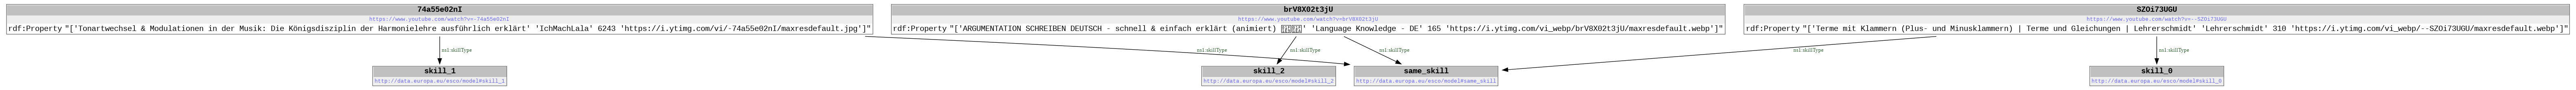

In [147]:
# plot the graph
def visualize(current_graph):
    stream = io.StringIO()
    rdf2dot(current_graph, stream, opts = {display})
    dg = pydotplus.graph_from_dot_data(stream.getvalue())
    png = dg.create_png()
    display(Image(png))

visualize(g)

In [149]:
# download graph & get a better plot!--> https://www.ldf.fi/service/rdf-grapher
g.serialize(destination='example_graph_0.ttl')

<Graph identifier=N3df2ccb07e2c43fcbbd5c844279cc257 (<class 'rdflib.graph.Graph'>)>